# Scan LSST aerosols during 10 years

- Author :Sylvie Dagoret-Campagne
- affiliation : LAL,IN2P3,CNRS
- organization : LSST 

- creation : Tuesday 2nd May 2016



In [26]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
import h5py
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import libCaliopAOD as cal

In [27]:
#from __future__ import print_function
import datetime
from matplotlib.dates import MonthLocator, WeekdayLocator,DateFormatter
from matplotlib.dates import MONDAY

In [28]:
year_start=2007   # choose the month number
year_stop=2015   # choose the month number
month_start=0      # choose first month
month_stop=11      # choose last month
month_numbers=np.arange(month_start,month_stop+1)
month_stringnumber=['01','02','03','04','05','06','07','08','09','10','11','12']

In [29]:
path_root='/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/CALIPSO/DATA/ICARE/CALIOP/L3/CAL_LID_L3_APro_AllSky.v3.00/CAL_LID_L3_APro_AllSky.v3.00'

In [30]:
filename_base='CAL_LID_L3_APro_AllSky-Standard-V3-00' # 

In [31]:
nb_of_years=year_stop-year_start+1                               # number of years   
number_of_monthes_per_year=month_numbers.shape[0]               # number of months per year
total_number_of_monthes=number_of_monthes_per_year*nb_of_years  # total number of monthes over years

### defines constants

In [32]:
data_dates=np.array(datetime.date(year_start,month_start+1,1))

In [33]:
path_root='/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/CALIPSO/DATA/ICARE/CALIOP/L3/CAL_LID_L3_APro_AllSky.v3.00/CAL_LID_L3_APro_AllSky.v3.00'
fullpath_root=os.path.join(os.path.join(path_root,str(2007)),'hdf5')
filename_base='CAL_LID_L3_APro_AllSky-Standard-V3-00' 

In [34]:
dayfile_extension= str(year_start)+'-'+month_stringnumber[month_start]+'D'+'.h5'
nightfile_extension=str(year_start)+'-'+month_stringnumber[month_start]+'N'+'.h5'
dayfile_fullname=os.path.join(fullpath_root,filename_base+'.'+dayfile_extension)
nightfile_fullname=os.path.join(fullpath_root,filename_base+'.'+nightfile_extension)
dayfiles_fullname=np.array(dayfile_fullname)
nightfiles_fullname=np.array(nightfile_fullname)

### defines the list of dates and filenames for days and night

In [35]:
for year in range(2007,2016,1):
    fullpath_root=os.path.join(os.path.join(path_root,str(2007)),'hdf5')   
    for month in range(1,13):
        if not (year == 2007 and month ==1):
            dayfile_extension= str(year)+'-'+month_stringnumber[month-1]+'D'+'.h5'
            nightfile_extension=str(year)+'-'+month_stringnumber[month-1]+'N'+'.h5'
            dayfiles_fullname=np.append(dayfiles_fullname,os.path.join(fullpath_root,filename_base+'.'+dayfile_extension))
            nightfiles_fullname=np.append(nightfiles_fullname,os.path.join(fullpath_root,filename_base+'.'+nightfile_extension))
            data_dates= np.append( data_dates , datetime.date(year,month,1))

### Extract data from the files using the library

In [36]:
temperatures=cal.GetL3Value(dayfiles_fullname[0],'Temperature_Mean') # vector quantities
pressures=cal.GetL3Value(dayfiles_fullname[0],'Pressure_Mean')
humidity=cal.GetL3Value(dayfiles_fullname[0],'Relative_Humidity_Mean')
altitudes=cal.GetL3APAltitudes()
altitudes_depth=cal.GetL3APAltitudesDepth()*1000.  # depth in meters
thealtitudes=altitudes[0:len(temperatures)]

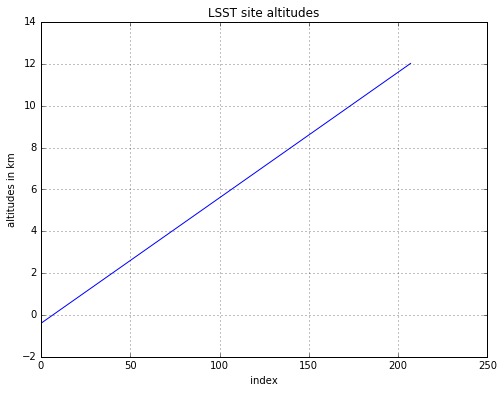

In [37]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(1,1,1)
ax.plot(altitudes)
title= "LSST site altitudes"
ax.set_ylabel('altitudes in km')
ax.set_xlabel(' index ')
ax.grid(True)
plt.title(title)

60.0

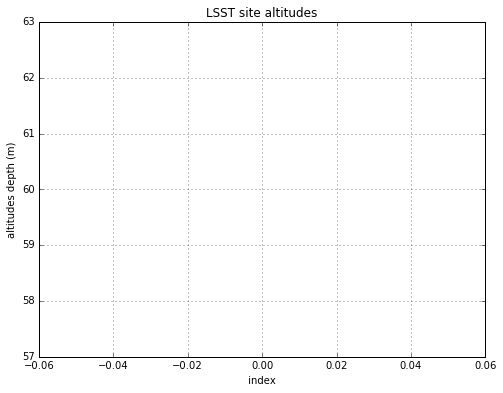

In [38]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(1,1,1)
ax.plot(altitudes_depth)
title= "LSST site altitudes"
ax.set_ylabel('altitudes depth (m)')
ax.set_xlabel(' index ')
ax.grid(True)
plt.title(title)
altitudes_depth

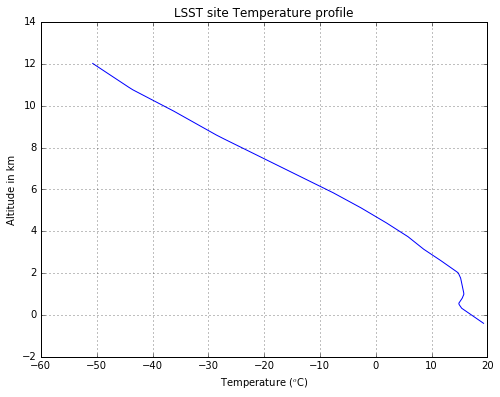

In [39]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(1,1,1)
#ax.plot(temperatures,np.arange(0,temperatures.size))
ax.plot(temperatures,thealtitudes)
title= "LSST site Temperature profile"
ax.set_ylabel('Altitude in km')
ax.set_xlabel('Temperature ($^o$C)')
ax.grid(True)
plt.title(title)

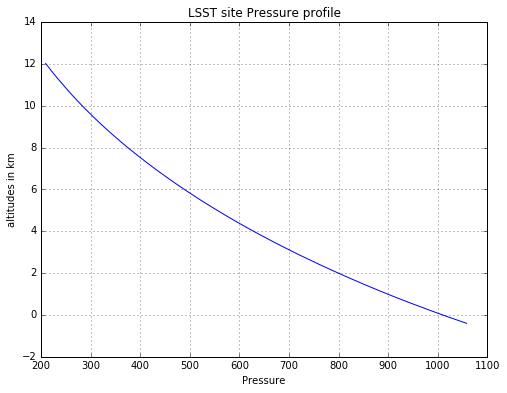

In [40]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(1,1,1)
ax.plot(pressures,thealtitudes)
title= "LSST site Pressure profile"
ax.set_ylabel('altitudes in km')
ax.set_xlabel('Pressure')
ax.grid(True)
plt.title(title)

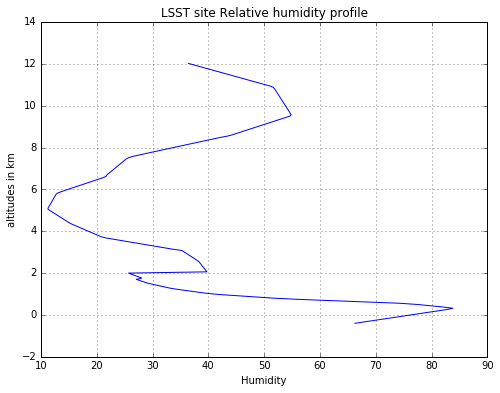

In [41]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(1,1,1)
ax.plot(humidity,thealtitudes)
title= "LSST site Relative humidity profile"
ax.set_ylabel('altitudes in km')
ax.set_xlabel('Humidity')
ax.grid(True)
plt.title(title)

In [42]:
import air
import humidity as hum

In [43]:
naltslices=len(humidity)
esat=hum.esat(temperatures+273.)
pwv=hum.rh2ah(humidity/100.,pressures*100.,temperatures+273.)*60./10 # don't know why need to devide by 10 ???
pwvcut=pwv
pwvcut[np.where(thealtitudes<2.68)]=0
sumpwv=np.cumsum(pwvcut)
for iz in range(0,naltslices):
   
    
    print 'iz',iz, 'alt = ',thealtitudes[iz],'RH =',humidity[iz] ,' P= ',pressures[iz],'T =',temperatures[iz],'esat=',esat[iz],\
    'pwv=',pwv[iz],'sumpwv=',sumpwv[iz]
    

iz 0 alt =  -0.4 RH = 66.2506  P=  1058.08 T = 19.3249 esat= 2221.67 pwv= 0.0 sumpwv= 0.0
iz 1 alt =  -0.34 RH = 67.7522  P=  1050.71 T = 18.9962 esat= 2176.56 pwv= 0.0 sumpwv= 0.0
iz 2 alt =  -0.28 RH = 69.2538  P=  1043.39 T = 18.6675 esat= 2132.25 pwv= 0.0 sumpwv= 0.0
iz 3 alt =  -0.22 RH = 70.7554  P=  1036.12 T = 18.3388 esat= 2088.73 pwv= 0.0 sumpwv= 0.0
iz 4 alt =  -0.16 RH = 72.257  P=  1028.9 T = 18.0101 esat= 2046.0 pwv= 0.0 sumpwv= 0.0
iz 5 alt =  -0.1 RH = 73.7585  P=  1021.73 T = 17.6814 esat= 2004.03 pwv= 0.0 sumpwv= 0.0
iz 6 alt =  -0.04 RH = 75.2601  P=  1014.62 T = 17.3528 esat= 1962.81 pwv= 0.0 sumpwv= 0.0
iz 7 alt =  0.02 RH = 76.7617  P=  1007.55 T = 17.0241 esat= 1922.35 pwv= 0.0 sumpwv= 0.0
iz 8 alt =  0.08 RH = 78.2633  P=  1000.53 T = 16.6954 esat= 1882.61 pwv= 0.0 sumpwv= 0.0
iz 9 alt =  0.14 RH = 79.7648  P=  993.557 T = 16.3667 esat= 1843.6 pwv= 0.0 sumpwv= 0.0
iz 10 alt =  0.2 RH = 81.2664  P=  986.635 T = 16.038 esat= 1805.3 pwv= 0.0 sumpwv= 0.0
iz 11 alt =